<a href="https://colab.research.google.com/github/myounghunseo/PowerApps-Samples/blob/master/%EC%84%9C%EB%AA%85%ED%9B%88_%EA%B0%9C%EC%9D%B8%ED%99%94_%EC%B6%94%EC%B2%9C_%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Wine review

1. download a dataset  : 
https://storage.googleapis.com/sara-cloud-ml/wine_data.csv

2. Feauture 소개
* country : 와인 원산지
* description : 와인의 맛, 향, 모양, 느낌들을 묘사한 소물리에의 코멘트
* designation : 와이너리 내의 포도밭(와이을 만든 포도가 있는) 
* points : 와인 매니아가 평가한 점수(1~100점)
* price : 와인 가격(병당)
* province : 주 (와인이 공급되는)
* region_1 : 주 내의 와인 재배지역 price : 와인 가격(병당)
* province : 주 (와인이 공급되는)
* region_1 : 주 내의 와인 재배지역
* region_2 : 와인 재배지역 내의 지역
* variety : 포도의 종류
* winery : 와인이 만들어지는 곳

> 타입 구분

1.   숫자형 : points , price
2.   object형 : 그 외 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine_data.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
df.shape

(150929, 11)

In [4]:
# 데이터 모델 성능을 고려해서 5000개로 줄이기
df = df[:5000]
df.shape

(5000, 11)

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.shape

(5000, 10)

## EDA 01
    - check the columns
    - check the Nan values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      4998 non-null   object 
 1   description  5000 non-null   object 
 2   designation  3636 non-null   object 
 3   points       5000 non-null   int64  
 4   price        4731 non-null   float64
 5   province     4998 non-null   object 
 6   region_1     4218 non-null   object 
 7   region_2     2051 non-null   object 
 8   variety      5000 non-null   object 
 9   winery       5000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 390.8+ KB


In [7]:
df.describe()

,points,price
count,5000.000000,4731.000000
mean,89.260000,37.323187
std,2.421482,34.356688
min,81.000000,4.000000
25%,88.000000,20.000000
50%,89.000000,28.000000
75%,91.000000,45.000000
max,100.000000,848.000000




*   points는 81에서 100 사이에 분포합니다.
*   price는 4에서 848 사이에 분포하고, 편차가 큽니다.



In [8]:
df.describe(include=object).T

,count,unique,top,freq
country,4998,30,US,2153
description,5000,4722,"Citrus, Mediterranean herb and cut grass aroma...",2
designation,3636,2736,Reserve,62
province,4998,166,California,1444
region_1,4218,396,Alsace,159
region_2,2051,18,Central Coast,513
variety,5000,242,Pinot Noir,558
winery,5000,2711,Fess Parker,15


In [9]:
df.isnull().sum()

country           2
description       0
designation    1364
points            0
price           269
province          2
region_1        782
region_2       2949
variety           0
winery            0
dtype: int64

In [10]:
for col in df.columns:
    msg = 'columns: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

columns:    country	 Percent of Nan value: 0.04%
columns: description	 Percent of Nan value: 0.00%
columns: designation	 Percent of Nan value: 27.28%
columns:     points	 Percent of Nan value: 0.00%
columns:      price	 Percent of Nan value: 5.38%
columns:   province	 Percent of Nan value: 0.04%
columns:   region_1	 Percent of Nan value: 15.64%
columns:   region_2	 Percent of Nan value: 58.98%
columns:    variety	 Percent of Nan value: 0.00%
columns:     winery	 Percent of Nan value: 0.00%


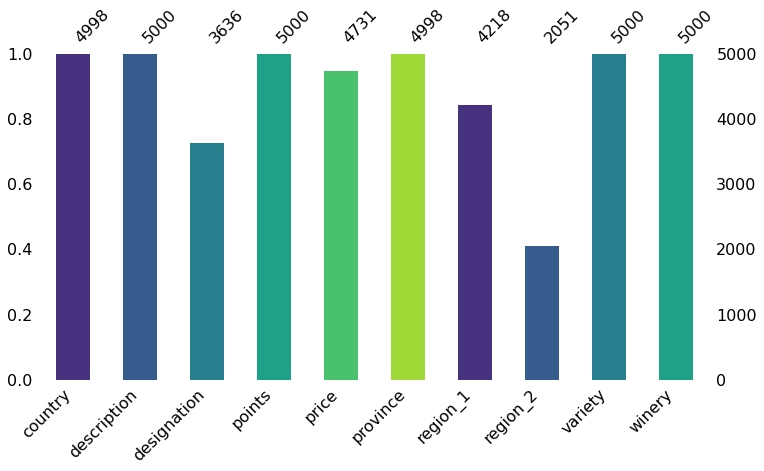

In [11]:
# Missing values
msno.bar(df, color=sns.color_palette('viridis'), figsize=(12,6))

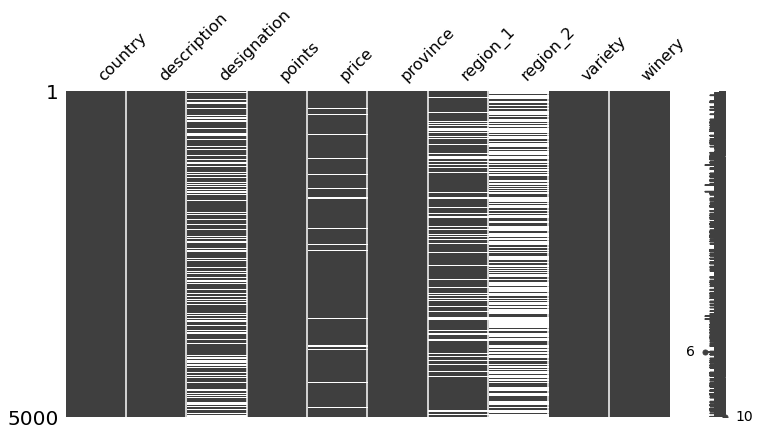

In [12]:
msno.matrix(df, figsize=(12,6))

## EDA 02
    - Check the distribution points and price with null

In [13]:
df.isnull()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,True,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,True,False,False
4997,False,False,False,False,False,False,False,True,False,False
4998,False,False,False,False,False,False,False,False,False,False


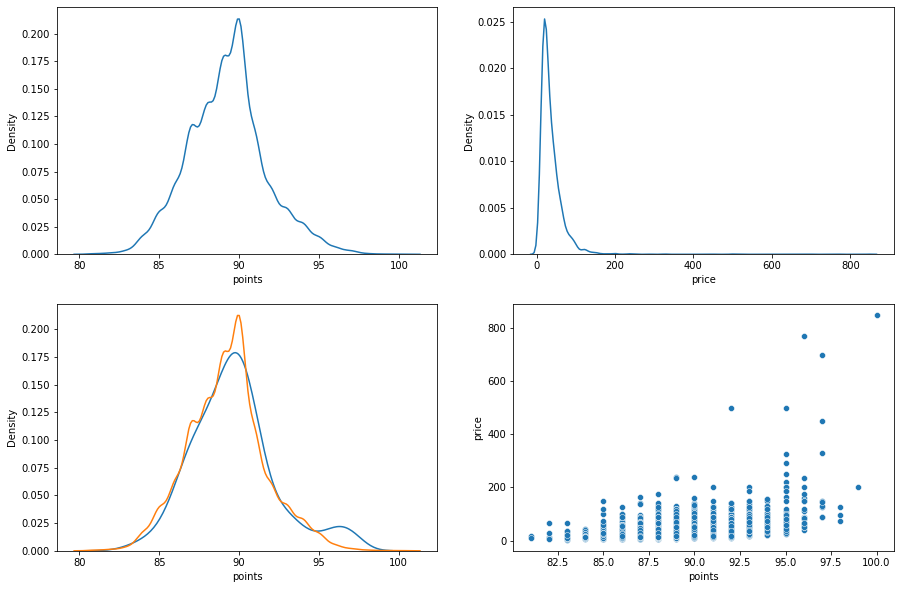

In [14]:
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,10))
sns.kdeplot(df['points'], ax=ax1)
sns.kdeplot(df[df['price'].isnull()]['points'], ax=ax3)
sns.kdeplot(df[df['price'].isnull()==False]['points'], ax=ax3)
sns.kdeplot(df['price'], ax=ax2)
sns.scatterplot(y='price', x='points', data=df, ax=ax4)

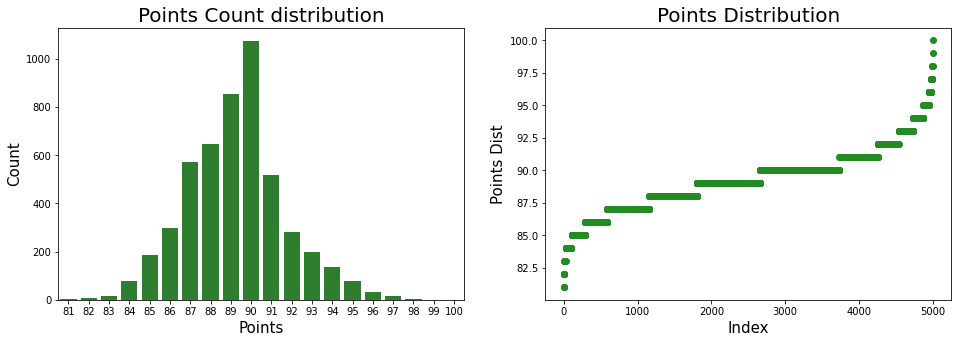

In [15]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
g = sns.countplot(x='points', data=df, color='forestgreen')
g.set_title('Points Count distribution', fontsize=20)
g.set_xlabel('Points', fontsize=15)
g.set_ylabel('Count',fontsize=15)

plt.subplot(1,2,2)
plt.scatter(range(df.shape[0]), np.sort(df.points.values), color='forestgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Points Dist', fontsize=15)
plt.title('Points Distribution',fontsize=20)
plt.show()

In [16]:
df[1000:1100]['points']

1000    85
1001    85
1002    85
1003    85
1004    85
        ..
1095    87
1096    87
1097    87
1098    87
1099    87
Name: points, Length: 100, dtype: int64

In [17]:
pd.cut(df['points'], 5)

0         (92.4, 96.2]
1         (92.4, 96.2]
2         (92.4, 96.2]
3         (92.4, 96.2]
4         (92.4, 96.2]
             ...      
4995    (80.981, 84.8]
4996    (80.981, 84.8]
4997    (80.981, 84.8]
4998    (80.981, 84.8]
4999    (80.981, 84.8]
Name: points, Length: 5000, dtype: category
Categories (5, interval[float64]): [(80.981, 84.8] < (84.8, 88.6] < (88.6, 92.4] < (92.4, 96.2] <
                                    (96.2, 100.0]]

In [18]:
def cat_points(points):
    if points in list(range(80, 85)):
        return 0 
    elif points in list(range(85,89)):
        return 1
    elif points in list(range(89,92)):
        return 2
    elif points in list(range(92,96)):
        return 3
    else:
        return 4

df['rating_cat'] = df['points'].apply(cat_points)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


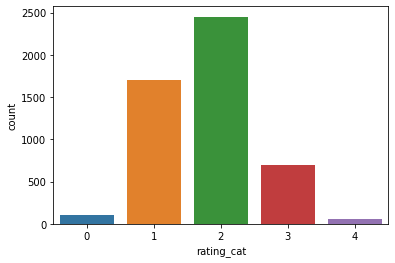

In [19]:
sns.countplot(df['rating_cat'])

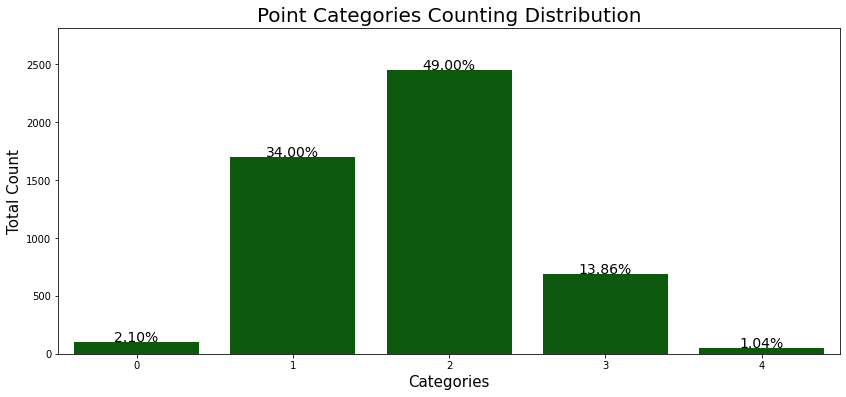

In [20]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen', data=df)
g.set_title('Point Categories Counting Distribution', fontsize=20)
g.set_xlabel('Categories', fontsize=15)
g.set_ylabel('Total Count', fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width() /2.,height + 3, '{:1.2f}%'.format((height/total)*100), ha='center', fontsize=14)

g.set_ylim(0, max(sizes)*1.15)
plt.show()

## EDA 03


*   Distribution of Wine Reviews by Countries
*   Distribution of Wine Reviews by Top 10 Countries
*   Distribution of Wine Reviews by Top 10 ~ 30 Countries
*   Most selling country is US 43%. 




Number of country list in data:  30


Text(0.5, 1.0, 'Distribution of Wine Reviews by Top 10 ~ 30 Countrie')

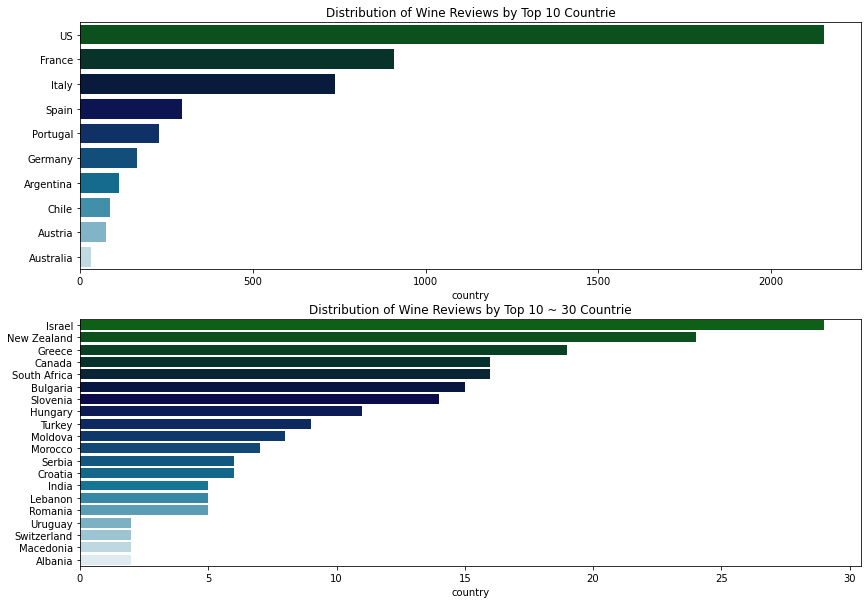

In [21]:
# Distribution of Wine Revies by Top 10 Countries

print('Number of country list in data: ', df['country'].nunique())
plt.figure(figsize=(14, 10))
cnt = df['country'].value_counts().to_frame()[0:10]
# plt.xscale('log')
plt.subplot(211)
sns.barplot(x=cnt['country'], y=cnt.index, data=cnt, palette='ocean', orient='h')
plt.title('Distribution of Wine Reviews by Top 10 Countrie')

cnt1 = df['country'].value_counts().to_frame()[10:30]
plt.subplot(212)
sns.barplot(x=cnt1['country'], y=cnt1.index, data=cnt1, palette='ocean', orient='h')
plt.title('Distribution of Wine Reviews by Top 10 ~ 30 Countrie')

In [22]:
df['country'].value_counts()

US              2153
France           908
Italy            737
Spain            294
Portugal         229
Germany          165
Argentina        114
Chile             88
Austria           74
Australia         33
Israel            29
New Zealand       24
Greece            19
Canada            16
South Africa      16
Bulgaria          15
Slovenia          14
Hungary           11
Turkey             9
Moldova            8
Morocco            7
Serbia             6
Croatia            6
India              5
Lebanon            5
Romania            5
Uruguay            2
Switzerland        2
Macedonia          2
Albania            2
Name: country, dtype: int64

In [23]:
df['country'].value_counts()[0] / len(df['country'])

0.4306

In [24]:
# add columns : price_log
# Let's get the price_log to better work this feature

df['price_log'] = np.log(df['price'])

## EDA 04


*   Distribution top 10 counties by price and rating




In [25]:
cnt.index.values

array(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Germany',
       'Argentina', 'Chile', 'Austria', 'Australia'], dtype=object)

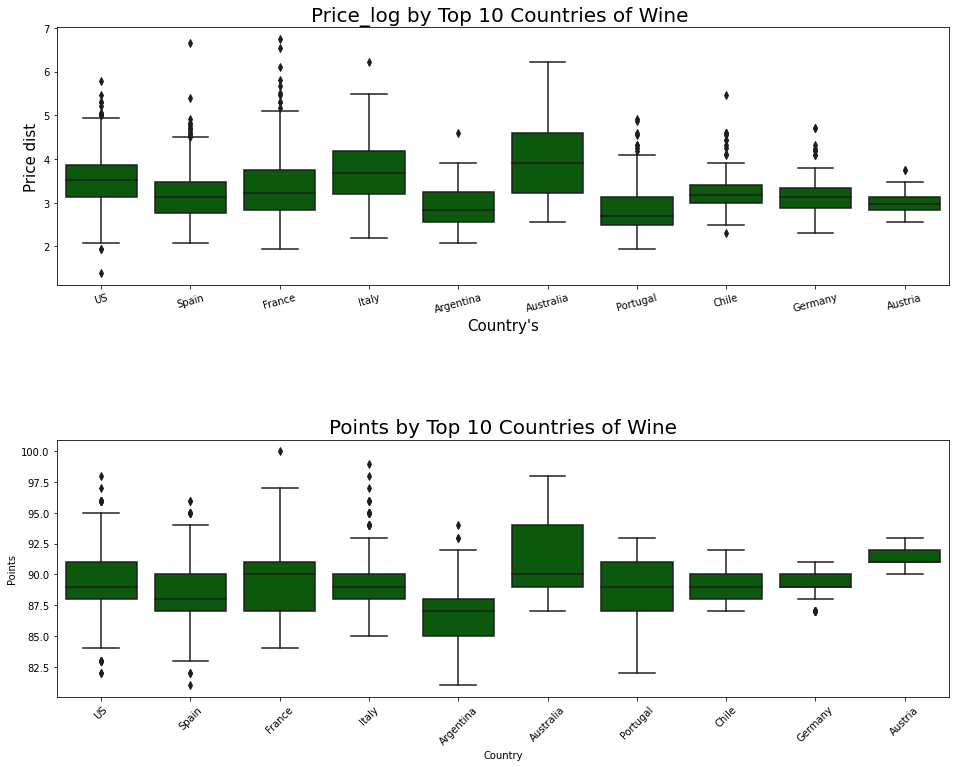

In [26]:
plt.figure(figsize=(16,12))

plt.subplot(211)
g = sns.boxplot(x='country', y='price_log', data=df.loc[df.country.isin(cnt.index.values)], color='darkgreen')
g.set_title('Price_log by Top 10 Countries of Wine ', fontsize=20)
g.set_xlabel("Country's", fontsize=15)
g.set_ylabel('Price dist', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=15)

plt.subplot(212)
g1 = sns.boxplot(x='country', y='points',data=df.loc[df.country.isin(cnt.index.values)], color='darkgreen')
g1.set_title('Points by Top 10 Countries of Wine', fontsize=20)
g1.set_xlabel('Country')
g1.set_ylabel('Points')
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace = 0.6, top=0.9)
plt.show()

*   Distribution top 10 ~ 30 counties by price and rating

In [27]:
cnt1.index.values

array(['Israel', 'New Zealand', 'Greece', 'Canada', 'South Africa',
       'Bulgaria', 'Slovenia', 'Hungary', 'Turkey', 'Moldova', 'Morocco',
       'Serbia', 'Croatia', 'India', 'Lebanon', 'Romania', 'Uruguay',
       'Switzerland', 'Macedonia', 'Albania'], dtype=object)

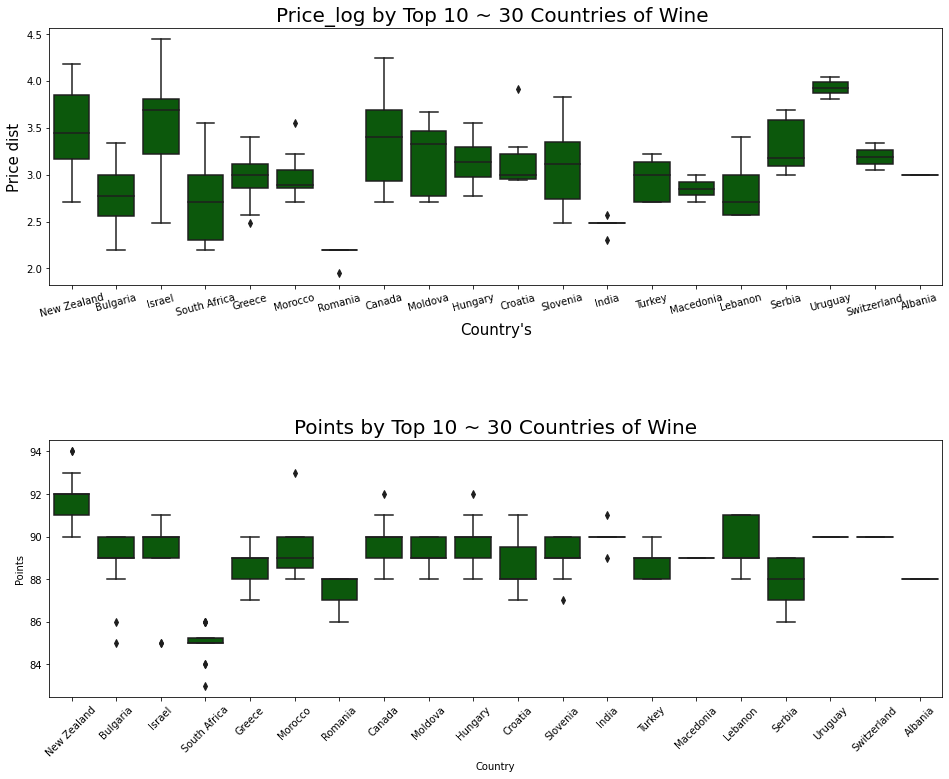

In [28]:
plt.figure(figsize=(16,12))

plt.subplot(211)
g = sns.boxplot(x='country', y='price_log', data=df.loc[df.country.isin(cnt1.index.values)], color='darkgreen')
g.set_title('Price_log by Top 10 ~ 30 Countries of Wine ', fontsize=20)
g.set_xlabel("Country's", fontsize=15)
g.set_ylabel('Price dist', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=15)

plt.subplot(212)
g1 = sns.boxplot(x='country', y='points',data=df.loc[df.country.isin(cnt1.index.values)], color='darkgreen')
g1.set_title('Points by Top 10 ~ 30 Countries of Wine', fontsize=20)
g1.set_xlabel('Country')
g1.set_ylabel('Points')
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace = 0.6, top=0.9)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot of price')

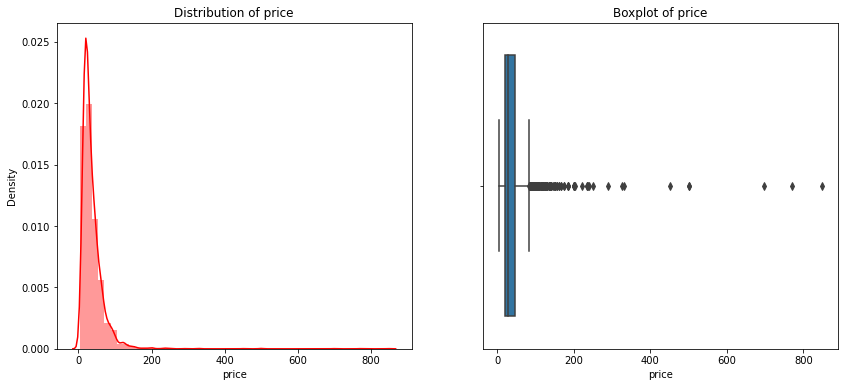

In [29]:
## Distribution of wine price

f, ax = plt.subplots(1,2, figsize=(14, 6))
ax1, ax2 = ax.flatten()
sns.distplot(df['price'], color='r', ax=ax1)
ax1.set_title('Distribution of price')
sns.boxplot(x = df['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


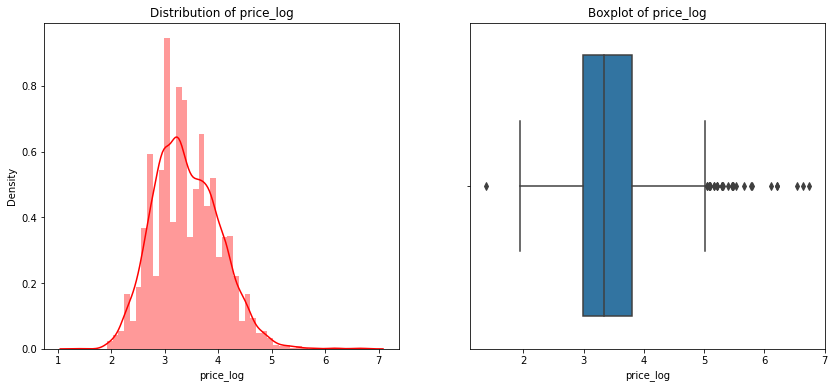

In [30]:
## Distribution of wine price_log

f, ax = plt.subplots(1,2, figsize=(14, 6))
ax1, ax2 = ax.flatten()
sns.distplot(df['price_log'], color='r', ax=ax1)
ax1.set_title('Distribution of price_log')
sns.boxplot(x = df['price_log'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price_log')
plt.show()

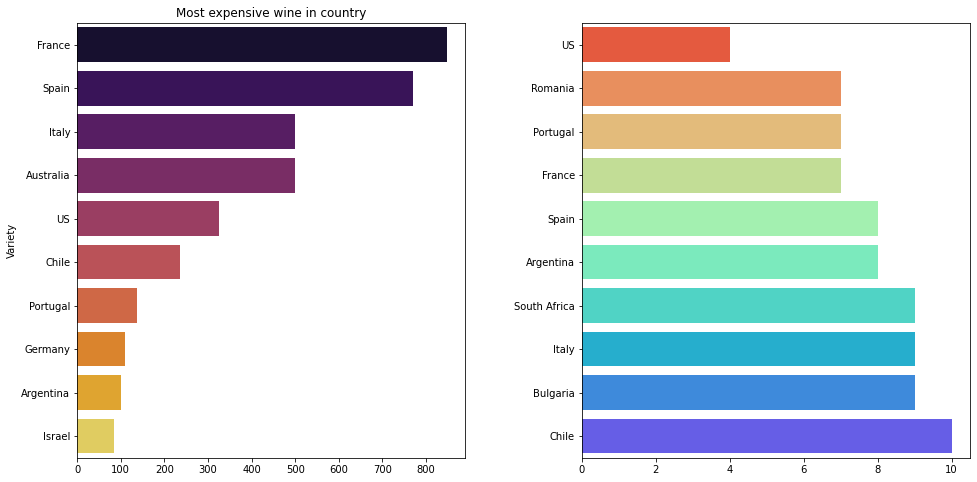

In [31]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

cnt = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:10]
sns.barplot(x = cnt['price'], y=cnt.index, palette='inferno', ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:10]
sns.barplot(x=cnt['price'], y=cnt.index, palette='rainbow_r', ax=ax2)
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3)

In [32]:
list(df)

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'rating_cat',
 'price_log']

In [33]:
df.describe()

,points,price,rating_cat,price_log
count,5000.000000,4731.000000,5000.000000,4731.000000
mean,89.260000,37.323187,1.777400,3.408564
std,2.421482,34.356688,0.744822,0.614962
min,81.000000,4.000000,0.000000,1.386294
25%,88.000000,20.000000,1.000000,2.995732
50%,89.000000,28.000000,2.000000,3.332205
75%,91.000000,45.000000,2.000000,3.806662
max,100.000000,848.000000,4.000000,6.742881


In [34]:
# 92점 기준으로 1, 0 변환하여, label 컬럼 추가
df['label'] = df['points'].apply(lambda x : x>=92).astype(int)

In [35]:
list(df)

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'rating_cat',
 'price_log',
 'label']

## 모델 생성

In [36]:
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, Model
from keras.layers import Input, Dense, concatenate
from keras.optimizers import Adam
import easydict

In [37]:
# wide 모델
class Wide:
    def __init__(self, args):
        self.learning_rate = args.learning_rate
        self.epochs = args.epochs
        self.batch_size = args.batch_size
        self.input_dim = args.input_dim
        self.model = self.classifier()

    def classifier(self):
        model = Sequential()
        model.add(Dense(1, activation='sigmoid', input_dim=self.input_dim))
        optimizer = Adam(lr=self.learning_rate, beta_1=0.9, beta_2=0.999)
        model.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
        return model

    def fit(self, x, y):
      # validation_split : validation set 20%
        self.model.fit(x, y, epochs=self.epochs, batch_size=self.batch_size, validation_split=0.2)

    def print_performance(self, x, y):
        performance_test = self.model.evaluate(x, y, batch_size=self.batch_size)
        print('Test Loss and Accuracy ->', performance_test)
    

In [38]:
# Deeo 모델
class Deep:
    def __init__(self, args):
        self.learning_rate = args.learning_rate
        self.epochs = args.epochs
        self.batch_size = args.batch_size
        self.input_dim = args.input_dim
        self.model = self.classifier()

    def classifier(self):
        model = Sequential()
        model.add(Dense(100, activation='relu', input_dim=self.input_dim))
        model.add(Dense(50, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = Adam(lr=self.learning_rate, beta_1=0.9, beta_2=0.999)
        model.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
        return model

    def fit(self, x, y):
        self.model.fit(x, y, epochs=self.epochs, batch_size=self.batch_size, validation_split=0.2)

    def print_performance(self, x, y):
        performance_test = self.model.evaluate(x, y, batch_size=self.batch_size)
        print('Test Loss and Accuracy ->', performance_test)

In [39]:
# wide&deep 모델

class WideAndDeep:
    def __init__(self, args):
        self.learning_rate = args.learning_rate
        self.epochs = args.epochs
        self.batch_size = args.batch_size
        self.input_dim = args.input_dim
        self.model = self.classifier()

    def classifier(self):
        optimizer = Adam(lr=self.learning_rate, beta_1=0.9, beta_2=0.999)

        # wide part
        wide = Input(shape=(self.input_dim,))

        # deep part
        deep_input = Input(shape=(self.input_dim,))
        deep = Dense(100, activation='relu')(deep_input)
        deep = Dense(50, activation='relu')(deep)

        # concatenate : wide and deep
        wide_n_deep = concatenate([wide, deep])
        wide_n_deep = Dense(1, activation='sigmoid')(wide_n_deep)
        model = Model(inputs=[wide, deep_input], outputs=wide_n_deep)
        model.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
        return model

    def fit(self, wide_x, deep_x, y):
        self.model.fit([wide_x, deep_x], y, epochs=self.epochs, batch_size=self.batch_size, validation_split=0.2)

    def print_performance(self, wide_x, deep_x, y):
        performance_test = self.model.evaluate([wide_x, deep_x], y, batch_size=self.batch_size)
        print('Test Loss and Accuracy ->', performance_test)

## 최종 컬럼 선택

In [40]:
# 최종 컬럼 선택

df_final = df[['country', 'price_log', 'label']].dropna() # Nan 컬럼 삭제

df_final = pd.get_dummies(df_final, prefix=['C']) # Country 를 C로 줄여서 컬럼 생성

y = df_final.label.values # label 컬럼값 지정

# 피처 테이블만 지정 
df_final = df_final.drop(['label'], axis=1)

# MinMaxScaler 사용
df_final = pd.DataFrame(MinMaxScaler().fit_transform(df_final), columns=df_final.columns)

x = df_final.values # feature 컬럼값 지정

In [41]:
from sklearn.model_selection import train_test_split
# 트레인 셋, 테스트 셋 분리 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [42]:
# args 지정

args = easydict.EasyDict({
  "batch_size": 500,
  "epochs": 30,
  "learning_rate": 0.001,
  "input_dim": x_train.shape[1]
})

## wide 모델 실행

In [43]:
wide=Wide(args)
wide.fit(x_train, y_train)
wide.print_performance(x_test, y_test)

Epoch 1/30
7/7 [==============================] - 1s 103ms/step - loss: 0.6918 - accuracy: 0.4053 - val_loss: 0.6816 - val_accuracy: 0.4333
Epoch 2/30
7/7 [==============================] - 0s 13ms/step - loss: 0.6856 - accuracy: 0.4113 - val_loss: 0.6762 - val_accuracy: 0.4346
Epoch 3/30
7/7 [==============================] - 0s 13ms/step - loss: 0.6809 - accuracy: 0.4156 - val_loss: 0.6708 - val_accuracy: 0.4425
Epoch 4/30
7/7 [==============================] - 0s 13ms/step - loss: 0.6768 - accuracy: 0.4245 - val_loss: 0.6656 - val_accuracy: 0.4478
Epoch 5/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6728 - accuracy: 0.4285 - val_loss: 0.6605 - val_accuracy: 0.4557
Epoch 6/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6673 - accuracy: 0.4396 - val_loss: 0.6555 - val_accuracy: 0.4571
Epoch 7/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6599 - accuracy: 0.4571 - val_loss: 0.6506 - val_accuracy: 0.4729
Epoch 8/30
7/7 [==========

## Deep 모델 실행

In [44]:
deep = Deep(args)
deep.fit(x_train, y_train)
deep.print_performance(x_test, y_test)

Epoch 1/30
7/7 [==============================] - 1s 41ms/step - loss: 0.6514 - accuracy: 0.7693 - val_loss: 0.5796 - val_accuracy: 0.8600
Epoch 2/30
7/7 [==============================] - 0s 15ms/step - loss: 0.5662 - accuracy: 0.8437 - val_loss: 0.5066 - val_accuracy: 0.8600
Epoch 3/30
7/7 [==============================] - 0s 12ms/step - loss: 0.5005 - accuracy: 0.8464 - val_loss: 0.4530 - val_accuracy: 0.8600
Epoch 4/30
7/7 [==============================] - 0s 12ms/step - loss: 0.4491 - accuracy: 0.8524 - val_loss: 0.4217 - val_accuracy: 0.8600
Epoch 5/30
7/7 [==============================] - 0s 12ms/step - loss: 0.4288 - accuracy: 0.8492 - val_loss: 0.4103 - val_accuracy: 0.8600
Epoch 6/30
7/7 [==============================] - 0s 12ms/step - loss: 0.4169 - accuracy: 0.8515 - val_loss: 0.4066 - val_accuracy: 0.8600
Epoch 7/30
7/7 [==============================] - 0s 13ms/step - loss: 0.4335 - accuracy: 0.8412 - val_loss: 0.4026 - val_accuracy: 0.8600
Epoch 8/30
7/7 [===========

## wide_n_deep 모델 실행

In [45]:
wide_n_deep = WideAndDeep(args)
wide_n_deep.fit(x_train, x_train, y_train)
wide_n_deep.print_performance(x_test, x_test, y_test)

Epoch 1/30
7/7 [==============================] - 1s 43ms/step - loss: 0.6759 - accuracy: 0.5559 - val_loss: 0.6191 - val_accuracy: 0.6209
Epoch 2/30
7/7 [==============================] - 0s 12ms/step - loss: 0.6007 - accuracy: 0.7184 - val_loss: 0.5521 - val_accuracy: 0.8600
Epoch 3/30
7/7 [==============================] - 0s 12ms/step - loss: 0.5353 - accuracy: 0.8495 - val_loss: 0.4922 - val_accuracy: 0.8600
Epoch 4/30
7/7 [==============================] - 0s 13ms/step - loss: 0.4834 - accuracy: 0.8486 - val_loss: 0.4477 - val_accuracy: 0.8600
Epoch 5/30
7/7 [==============================] - 0s 12ms/step - loss: 0.4474 - accuracy: 0.8464 - val_loss: 0.4218 - val_accuracy: 0.8600
Epoch 6/30
7/7 [==============================] - 0s 12ms/step - loss: 0.4288 - accuracy: 0.8480 - val_loss: 0.4114 - val_accuracy: 0.8600
Epoch 7/30
7/7 [==============================] - 0s 14ms/step - loss: 0.4137 - accuracy: 0.8535 - val_loss: 0.4069 - val_accuracy: 0.8600
Epoch 8/30
7/7 [===========

**Score (Test Loss and Accuracy)**

1.   wide          : [0.5509610176086426, 0.858350932598114]
2.   deep          : [0.36358708143234253, 0.8594080209732056]
3.   wide and deep : [0.3548527956008911, 0.8572938442230225]
